Saving nba_advanced_stats_2024_2025.csv to nba_advanced_stats_2024_2025 (6).csv


/tmp/ipython-input-7-2203133197.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='ESI', y='Player', data=top_esi, palette='Blues_d')


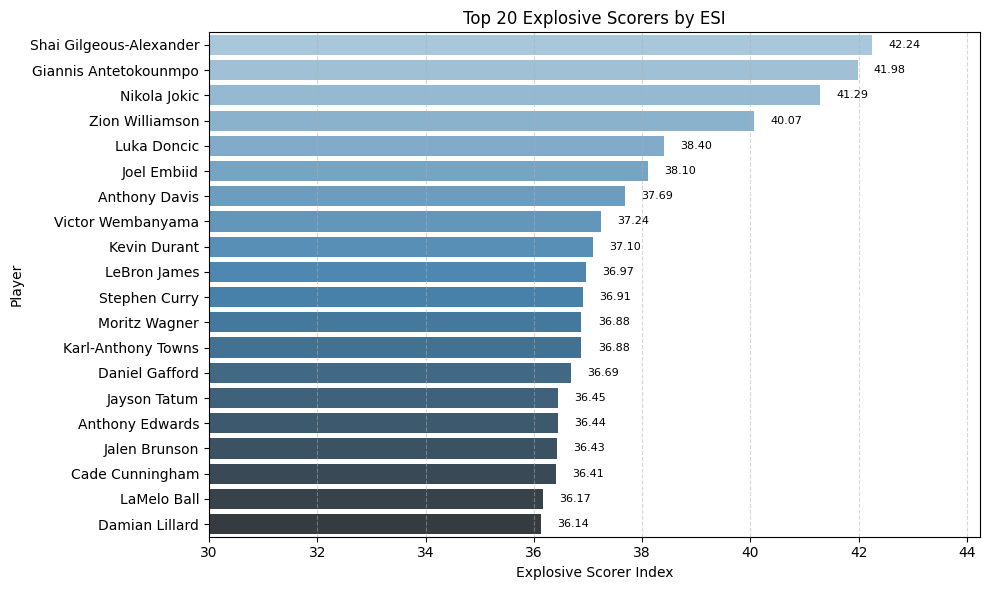

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# 📦 Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# 📁 Upload CSV File
uploaded = files.upload()
df = pd.read_csv('nba_advanced_stats_2024_2025.csv')

# 🧹 STEP 1: Filter out low-impact / low-sample players
df_filtered = df[(df['VORP'] > 0.1) & (df['WS'] > 1.0) & (df['PER'] > 5)]

# ❌ STEP 2: Drop missing values for essential stats
required_cols = ['USG%', 'PER', 'TS%']
df_esi = df_filtered.dropna(subset=required_cols)

# 🧼 STEP 3: Additional filters to stabilize scoring output
df_esi = df_esi[(df_esi['USG%'] > 10) & (df_esi['TS%'] > 0.4)]

# ✅ STEP 4: Remove duplicates and specific outliers
df_esi = df_esi.drop_duplicates(subset=['Player'])
df_esi = df_esi[df_esi['Player'] != 'Kai Jones']

# 🔥 STEP 5: Compute Explosive Scorer Index (ESI)
df_esi['ESI'] = (
    0.4 * df_esi['USG%'] +
    0.3 * df_esi['PER'] +
    0.3 * df_esi['TS%'] * 100  # Convert TS% to 0–100 scale
)

# 🏀 STEP 6: Get Top 20 Players by ESI
top_esi = df_esi.sort_values(by='ESI', ascending=False).head(20)
top_esi['ESI'] = top_esi['ESI'].round(2)  # ✅ Suggestion 1: Round for neatness

# 📊 STEP 7: Plot the leaderboard
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='ESI', y='Player', data=top_esi, palette='Blues_d')
plt.title('Top 20 Explosive Scorers by ESI')
plt.xlabel('Explosive Scorer Index')
plt.ylabel('Player')
plt.xlim(30, top_esi['ESI'].max() + 2)  # ✅ Suggestion 2: Better axis limits
plt.grid(axis='x', linestyle='--', alpha=0.5)  # ✅ Suggestion 3: Add gridlines

# ✅ Suggestion 4: Annotate bars with ESI score
for i, value in enumerate(top_esi['ESI']):
    plt.text(value + 0.3, i, f"{value:.2f}", va='center', fontsize=8)

plt.tight_layout()
plt.savefig("explosive_scorer_index.png")
plt.show()

# 💾 STEP 8: Export CSV and chart
top_esi.to_csv("top20_esi.csv", index=False)
files.download("top20_esi.csv")
files.download("explosive_scorer_index.png")